# 分類問題

## 郭耀仁

## 分類問題有哪些？

- 貸款顧客是否會倒帳
- 圖片辨識
- 垃圾郵件辨識
- ...etc.

## 迴歸問題的延伸

- 將 $h(x) = \theta^Tx$ 的結果利用**特定函數**轉換為簡單分類器
    - 感知器利用 *sign* 函數
    - 羅吉斯迴歸利用 *sigmoid* 函數
    - ...etc.

## 感知器利用 *sign* 函數

$$\hat{y} = H(\theta^{T}x)$$
其中，
$$  H(z)=
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 羅吉斯迴歸利用 *sigmoid* 函數

$$\hat{y} = H(g(\theta^{T}x))$$
其中，
$$g(z) = \frac{1}{1+e^{-z}}$$
$$  H(z)=
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## $\theta^Tx$ 為決策邊界

- 同樣請 scikit-learn 幫我們找到讓成本函數最低（誤分類率最低）的 $\theta$
    - 羅吉斯回歸
    - 隨機森林
    - 支援向量機

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

lg = LogisticRegression()
lg.fit(X, y)


plot_decision_regions(X, y, clf = lg,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Logistic Regression on Iris')

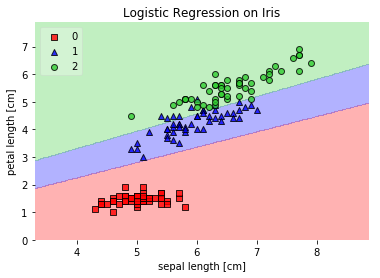

In [2]:
plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

rf = RandomForestClassifier()
rf.fit(X, y)


plot_decision_regions(X, y, clf = rf,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random forest on Iris')

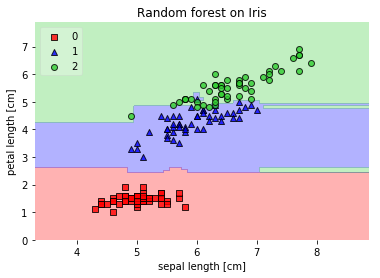

In [4]:
plt.show()

In [5]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

svm = SVC()
svm.fit(X, y)


plot_decision_regions(X, y, clf = svm,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Support vector machine on Iris')

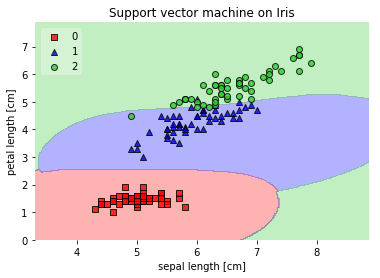

In [6]:
plt.show()